In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
diabetes= pd.read_csv('diabetes.csv')
df=diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.shape

(768, 9)

In [5]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

히트맵

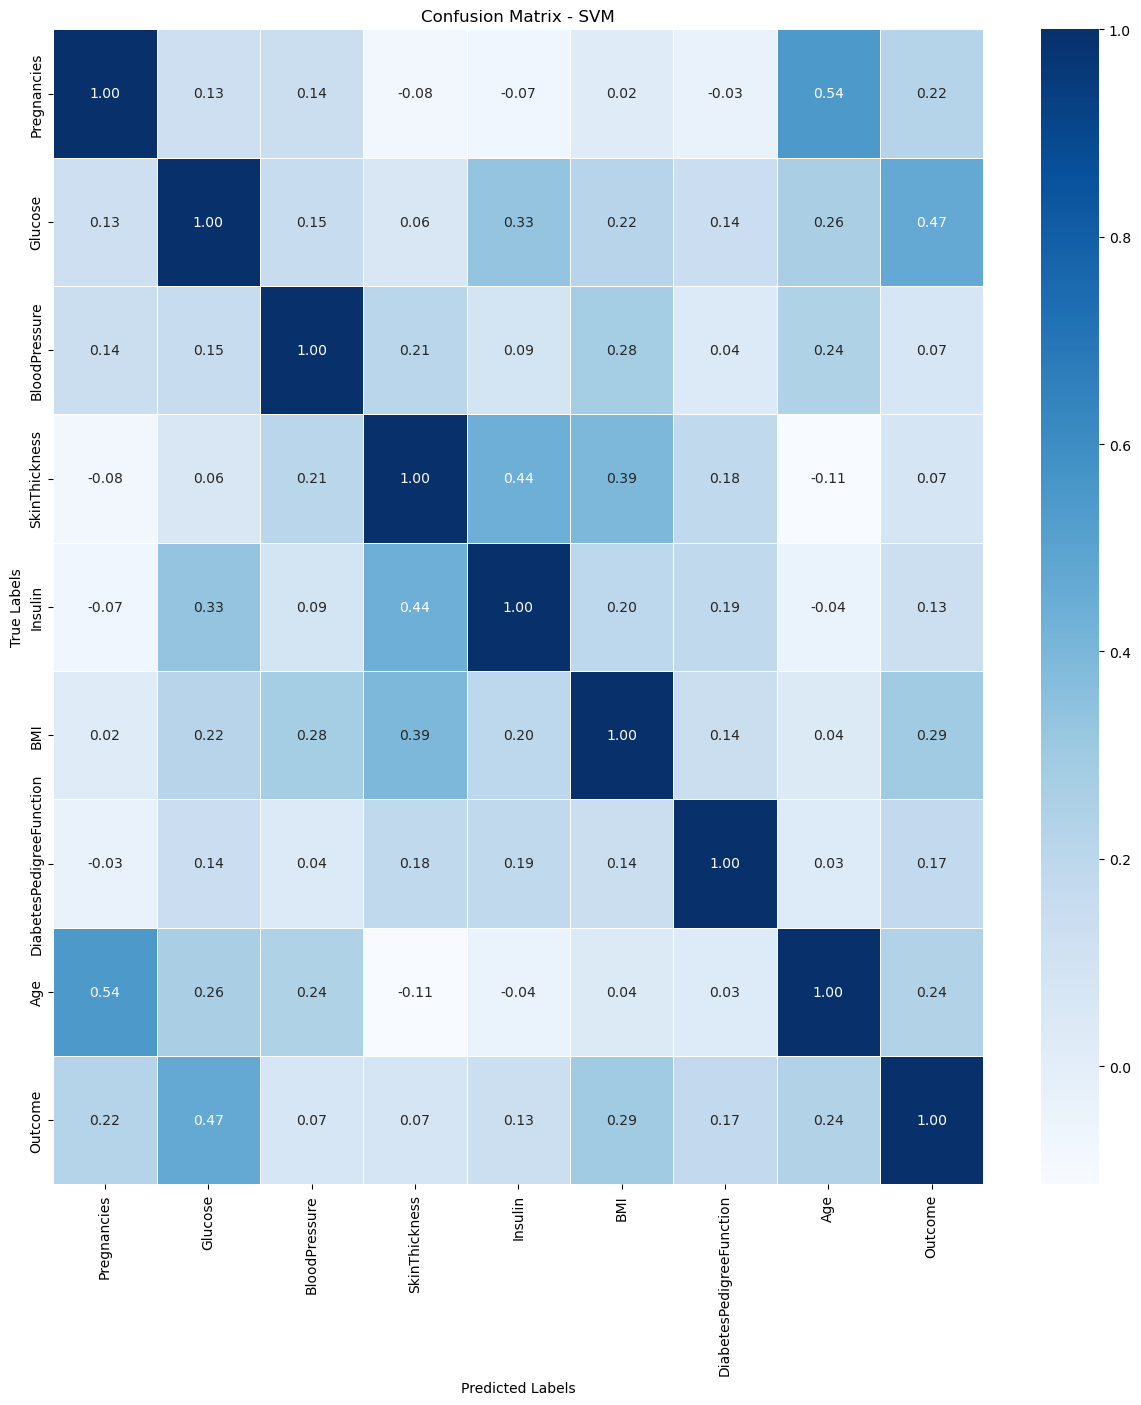

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=.5, fmt=".2f", ax=ax)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

세트 분리

In [9]:
X =df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y =df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (576, 8)
y_train: (576,)
X_test: (192, 8)
y_test: (192,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[115  15]
 [ 25  37]]


C:\Users\82109\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


In [16]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7239583333333334
[[103  27]
 [ 26  36]]


In [17]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7708333333333334
[[116  14]
 [ 30  32]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

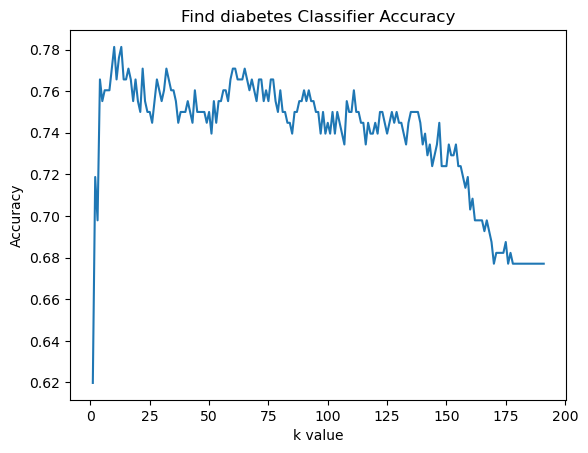

In [20]:
import matplotlib.pyplot as plt

k_range = range(1, 192)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find diabetes Classifier Accuracy")
plt.show()

In [21]:
df2 = diabetes.loc[:,['Glucose','BMI']]
df2

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1
...,...,...
763,101,32.9
764,122,36.8
765,121,26.2
766,126,30.1


In [56]:
b =df2.drop('Glucose', axis=1)
b.head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


In [57]:
g =df2['BMI']
g.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [58]:
b_train, b_test, g_train, g_test = train_test_split(b, g, test_size=0.25, random_state=0)
print('b_train:', b_train.shape)
print('g_train:', g_train.shape)
print('b_test:', b_test.shape)
print('g_test:', g_test.shape)

b_train: (576, 1)
g_train: (576,)
b_test: (192, 1)
g_test: (192,)


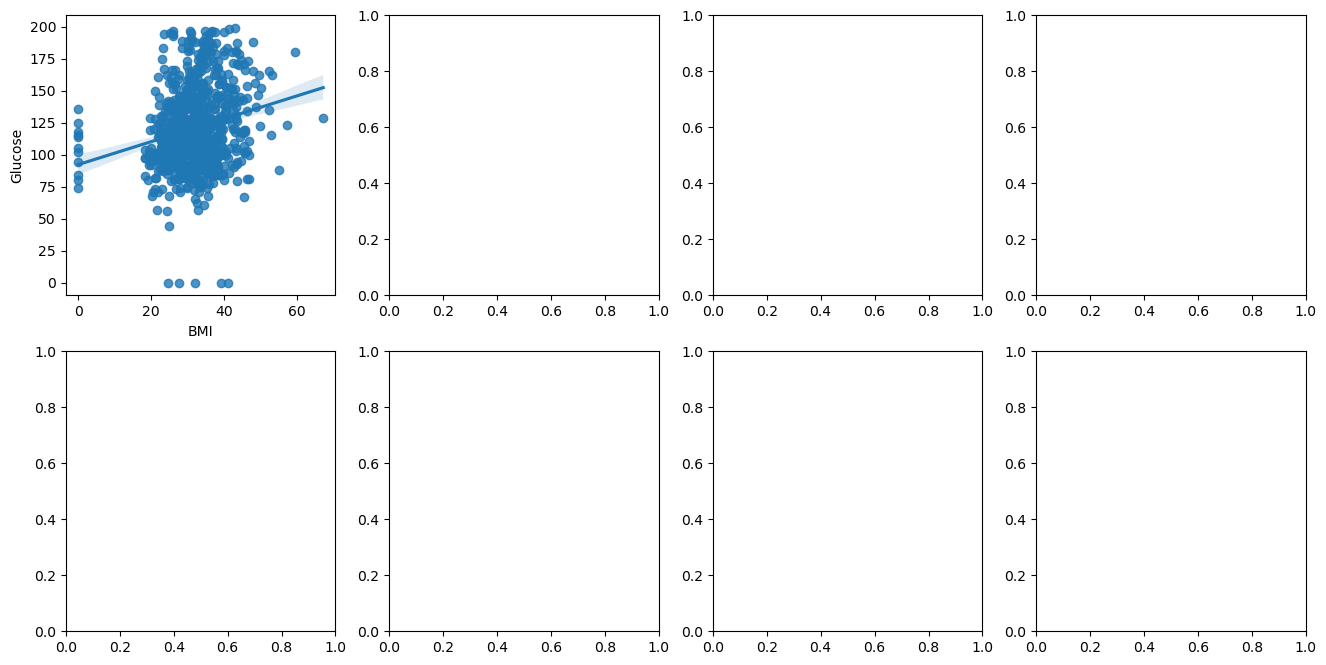

In [59]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['BMI']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Glucose', data=df, ax=axs[row][col])

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(b_train, g_train)

LinearRegression()

In [62]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [1.]
상수항(절편): -0.0


In [63]:
g_preds = lr.predict(b_test)
print(b_train.shape, b_test.shape)

(576, 1) (192, 1)


In [64]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(g_test, g_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(g_test, g_preds):.3f}')

MSE : 0.000, RMSE: 0.000
Variance score : 1.000


In [65]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: -2.842170943040401e-14
회귀계수: [1.]


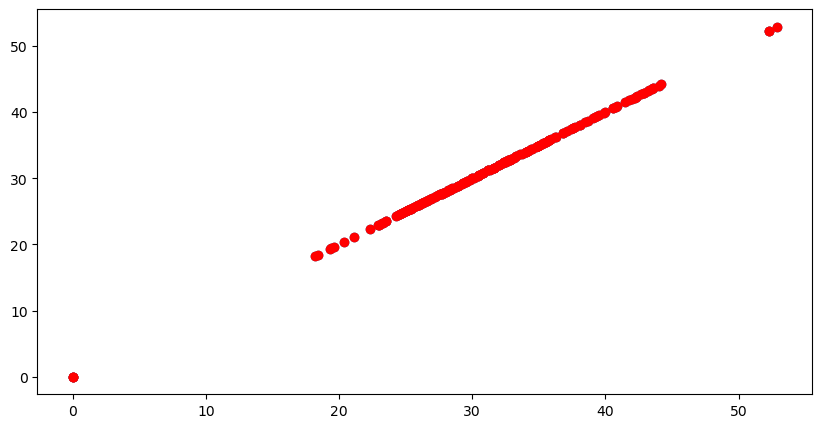

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(b_test['BMI'], g_test, label='g_test')
plt.scatter(b_test['BMI'], g_preds, c='r', label='g_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()       

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(b_train, g_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(b_test)
mse = np.sqrt(mean_squared_error(ly_preds, b_test))
print('평균제곱근오차', mse)

평균제곱근오차 6.8510746500567485e-15


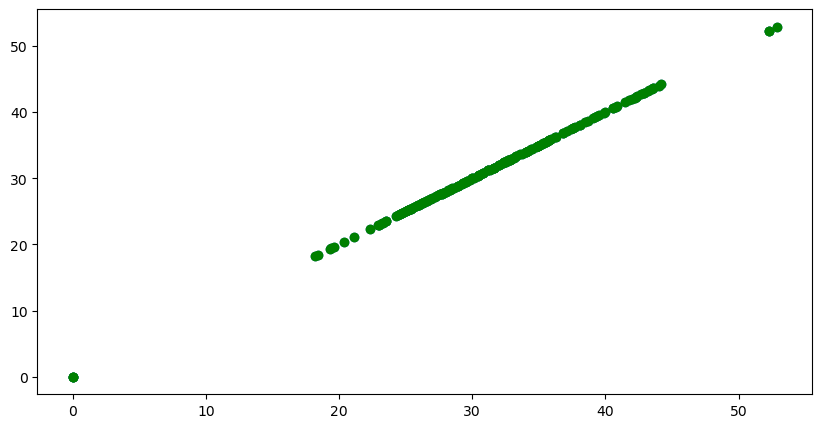

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(b_test['BMI'], g_test, label='g_test')
plt.scatter(b_test['BMI'], ly_preds, c='g', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

In [48]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(b_train, g_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(b_test)
mse = np.sqrt(mean_squared_error(dy_preds, g_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0129371484286016


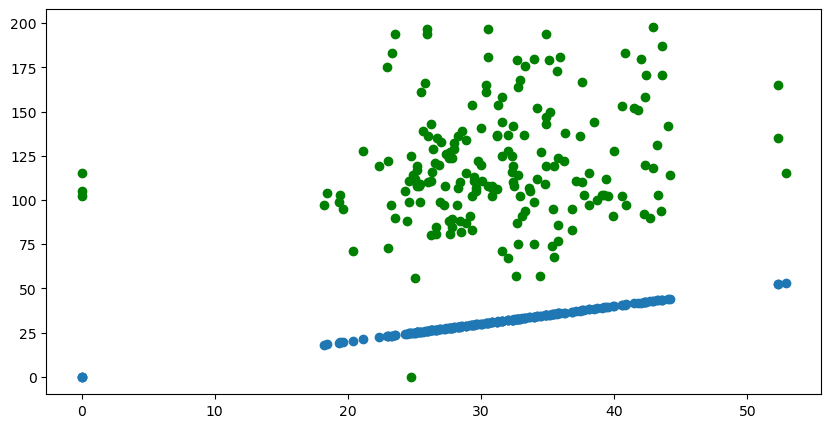

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(b_test['BMI'], g_test, label='g_test')
plt.scatter(b_test['BMI'], dy_preds, c='g', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(b_train, g_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(b_test)
mse = np.sqrt(mean_squared_error(ry_preds, g_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0359534155388779


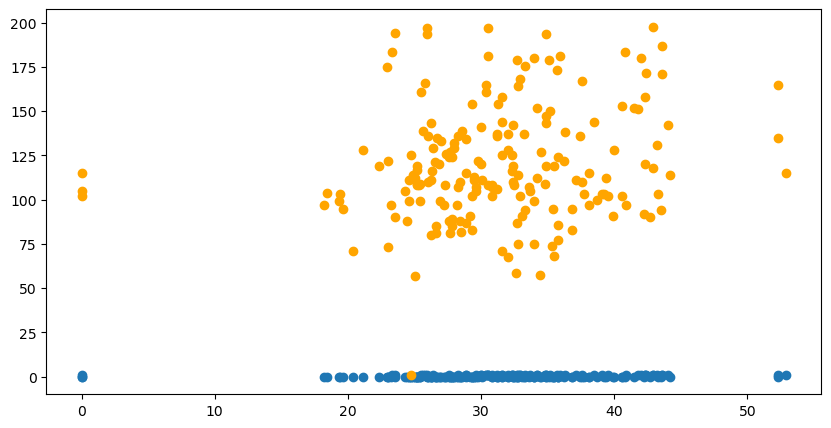

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='orange', label='ry_preds')

plt.show()       

In [55]:
from sklearn import svm

model.fit(b_train, g_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(b_test)
mse = np.sqrt(mean_squared_error(sy_preds, g_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0393257028798366


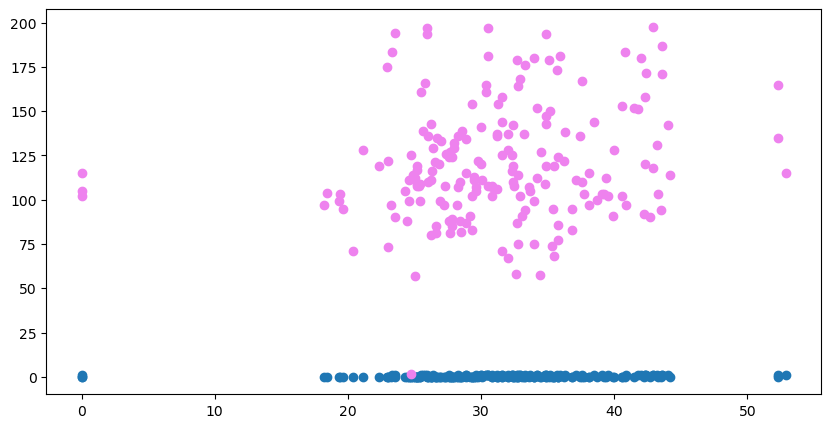

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(b_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], sy_preds, c='violet', label='sy_preds')

plt.show()      